In [3]:
# Import Libraries and Load the Data
# 1. Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For text preprocessing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# For displaying all columns
pd.set_option("display.max_columns", None)

# 2. Load Data
df = pd.read_csv(r"C:\Users\Mr. Louis\Downloads\fake.csv")

# 3. Preview
print("Shape:", df.shape)
df.head()

Shape: (12999, 20)


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [2]:
#Understand Data Structure
# Info on columns and types
df.info()

# Count missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

Label counts:
bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64


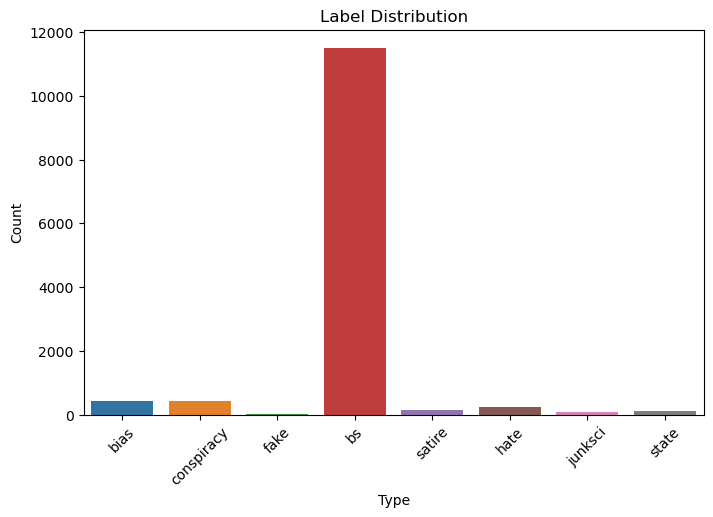

In [13]:
# Basic Statistics and Label Distribution
label_counts = df['type'].value_counts()
print("Label counts:")
print(label_counts)

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df)
plt.title('Label Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate if labels are long
plt.show()



In [ ]:
#Remove Unnecessary Columns
# Drop columns if needed
columns_to_drop = ['Unnamed: 0']  # Update this based on your dataset
df = df.drop(columns=columns_to_drop, errors='ignore')


In [5]:
#Preprocess Text Data
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Mr.
[nltk_data]     Louis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Mr.
[nltk_data]     Louis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
# Define cleaning function
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Check result
df[['text', 'clean_text']].head()


,text,clean_text
0,Print They should pay all the back all the mon...,print pay back money plus interest entire fami...
1,Why Did Attorney General Loretta Lynch Plead T...,attorney general loretta lynch plead fifth bar...
2,Red State : \nFox News Sunday reported this mo...,red state fox news sunday reported morning ant...
3,Email Kayla Mueller was a prisoner and torture...,email kayla mueller prisoner tortured isis cha...
4,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,email healthcare reform make america great sin...


In [7]:
#Basic Text Statistics
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(len)

# Summary
df[['word_count', 'char_count']].describe()


,word_count,char_count
count,12999.000000,12999.000000
mean,366.720594,2715.635972
std,547.735327,3954.736983
min,0.000000,0.000000
25%,104.000000,751.500000
50%,230.000000,1686.000000
75%,456.000000,3416.500000
max,20723.000000,137900.000000


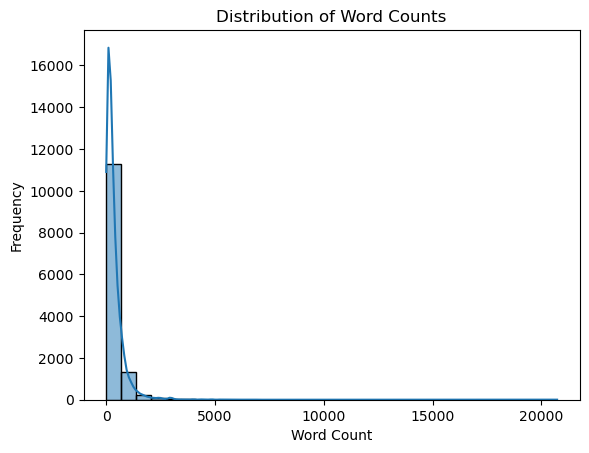

In [8]:
#Visualize word counts:
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Distribution of Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [9]:
#Save Cleaned Data for Next Phase
df.to_csv("cleaned_fake_news.csv", index=False)
print("Cleaned dataset saved.")


Cleaned dataset saved.
